In [1]:
#importamos las librerias adecuadas para la limpieza del modelo. 

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from scipy import stats


Importamos nuestro modelo train. 

In [2]:
df = pd.read_csv('../data/diamonds-datamad0620/train.csv')

shape and data types of the data

In [3]:
print(df.shape)
print(df.dtypes)

(40455, 11)
id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


Hacemos check del missing data.

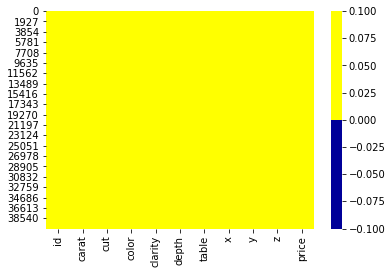

In [4]:
cols = df.columns
colours = ['#000099', '#ffff00'] #Amarillo falta no falta, azul falta.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
#Como podemos comprobar nuestro modelo esta limpisimo.

A continuación convertimos los datos categoricos a númericos. Hacemos este paso previo a buscar outliers.

In [5]:
df_numeric = pd.get_dummies(df)

In [6]:
print(df_numeric.shape)
print(df_numeric.dtypes)

(40455, 28)
id                 int64
carat            float64
depth            float64
table            float64
x                float64
y                float64
z                float64
price              int64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
dtype: object


In [7]:
df_numeric.head(5)

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.30,62.8,56.0,4.29,4.31,2.70,605,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0.34,62.6,55.0,4.46,4.49,2.80,565,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,0.40,61.8,59.2,4.72,4.74,2.92,793,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,0,...,0,0,0,0,1,0,0,0,0,0


Según la base de datos, table es la multiplicacion de X,Y,Z por lo que la eliminamos de nuestra base de datos ya que es informacion que podría ser dedundante. 

In [8]:
df_numeric.drop(["id","depth"],axis=1,inplace=True)

In [9]:
df_numeric.head(1)

,carat,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.3,56.0,4.29,4.31,2.7,605,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


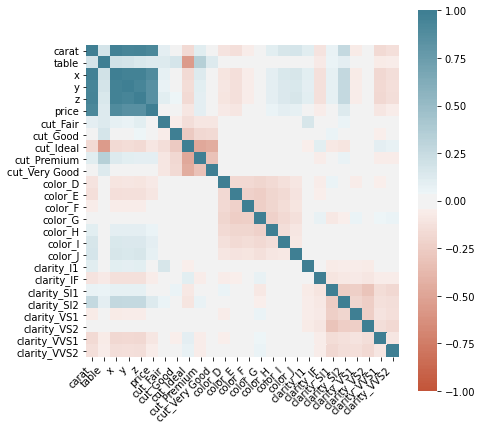

In [10]:
data = df_numeric

f, ax = plt.subplots(figsize=(7, 7))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Comprobamos que carat y  X,Y,Z son los valores con una correlacion positiva más alta. 

A continuación procedemos a limpiar de outliers nuestro dataset.

In [11]:
df_numeric.describe()

,carat,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797150,57.453561,5.729391,5.733217,3.537644,3928.715264,0.029317,0.090866,0.399827,0.253912,...,0.101051,0.051984,0.013373,0.032777,0.242566,0.169176,0.152021,0.227833,0.068718,0.093536
std,0.472872,2.235668,1.121283,1.151076,0.709557,3985.070609,0.168694,0.287423,0.489869,0.435253,...,0.301399,0.221997,0.114867,0.178055,0.428640,0.374912,0.359045,0.419440,0.252978,0.291186
min,0.200000,43.000000,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,946.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,2398.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,5328.500000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,95.000000,10.230000,58.900000,31.800000,18818.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos observar como existen valores en X,Y,Z que son 0, por lo que creo que son valores nulos. 

In [12]:
df_no_outliers = df_numeric[(np.abs(stats.zscore(df_numeric)) < 4.9).all(axis=1)]

In [13]:
print(df_no_outliers.shape)

(37527, 26)


In [14]:
pd.set_option('display.max_columns', None) 
df_no_outliers.describe()

,carat,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.0,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.0,37527.0,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000,37527.000000
mean,0.794754,57.426173,5.729798,5.733276,3.534823,3949.417246,0.0,0.094705,0.404136,0.264743,0.236416,0.128388,0.186852,0.175607,0.203880,0.151944,0.101287,0.052043,0.0,0.0,0.253311,0.172889,0.160258,0.240387,0.073654,0.099502
std,0.467532,2.127322,1.114548,1.107759,0.685585,4000.157690,0.0,0.292811,0.490731,0.441202,0.424886,0.334525,0.389798,0.380490,0.402886,0.358971,0.301712,0.222116,0.0,0.0,0.434913,0.378156,0.366850,0.427324,0.261210,0.299338
min,0.200000,51.000000,3.730000,3.680000,1.070000,326.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.720000,4.730000,2.910000,936.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,5.700000,5.710000,3.520000,2404.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,6.540000,6.540000,4.030000,5392.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.040000,66.000000,9.510000,9.460000,5.770000,18818.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hemos ido cambiando el valor de Z hasta conseguir que los valores númericos todos tengan un valor.Así nos quitamos los nulos escondidos.

In [15]:
df_no_outliers.to_csv('../Data/diamonds_output/Cleaned_diamonds.csv',index=False)